In [110]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/nndb_flat.csv')
df.head()

,id,foodgroup,shortdescrip,descrip,commonname,mfgname,scientificname,energy_kcal,protein_g,fat_g,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [111]:
df.shape

(8618, 45)

In [112]:
df.fillna(0, inplace=True)

In [113]:
# save the labels to a Pandas series target
Y = df['foodgroup']

# Get All Numeric Columns except label Column
X = df.iloc[:,7:46]

Make do_PCA function for PCA transformation

In [114]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [115]:
# We are providing only 3 numbers To make 4 Prinicpal Component
pca, X_pca = do_pca(3, X)
X_pca.shape

(8618, 3)

In [117]:
pca.components_.shape

(3, 38)

Two main aspects of principal components are:

1. **The amount of variability captured by the component.**
2. **The components themselves.**


In [118]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

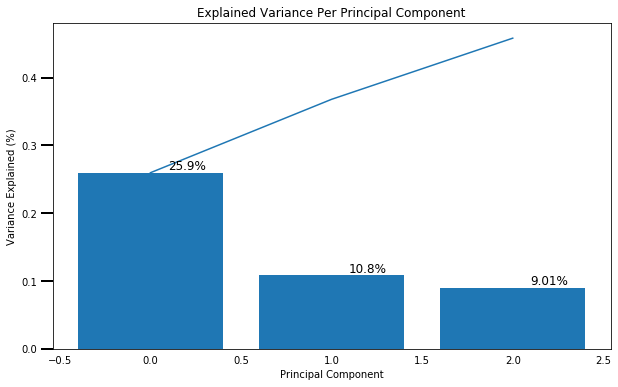

In [119]:
scree_plot(pca)

In [120]:
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (18,12))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,energy_kcal,protein_g,fat_g,carb_g,sugar_g,fiber_g,vita_mcg,vitb6_mg,vitb12_mcg,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
Dimension 1,0.2597,0.0933,0.1109,0.0131,0.0989,0.0388,0.1124,0.1091,0.2405,0.1478,...,0.2127,0.2588,0.2624,0.2048,0.1184,0.1404,0.1670,0.1478,0.0756,0.1878
Dimension 2,0.1083,-0.1072,0.1218,-0.0178,-0.2075,-0.1366,-0.1417,0.3382,-0.0830,0.3594,...,-0.1310,-0.0585,0.0136,-0.1399,-0.1057,0.3065,-0.0891,0.0013,0.1341,0.0482
Dimension 3,0.0902,0.1455,0.1491,0.1364,0.0091,-0.0378,0.1381,-0.0640,-0.1230,-0.0662,...,-0.1653,-0.1460,-0.1619,-0.1445,0.2990,0.1027,0.2833,0.3647,0.1203,0.0342


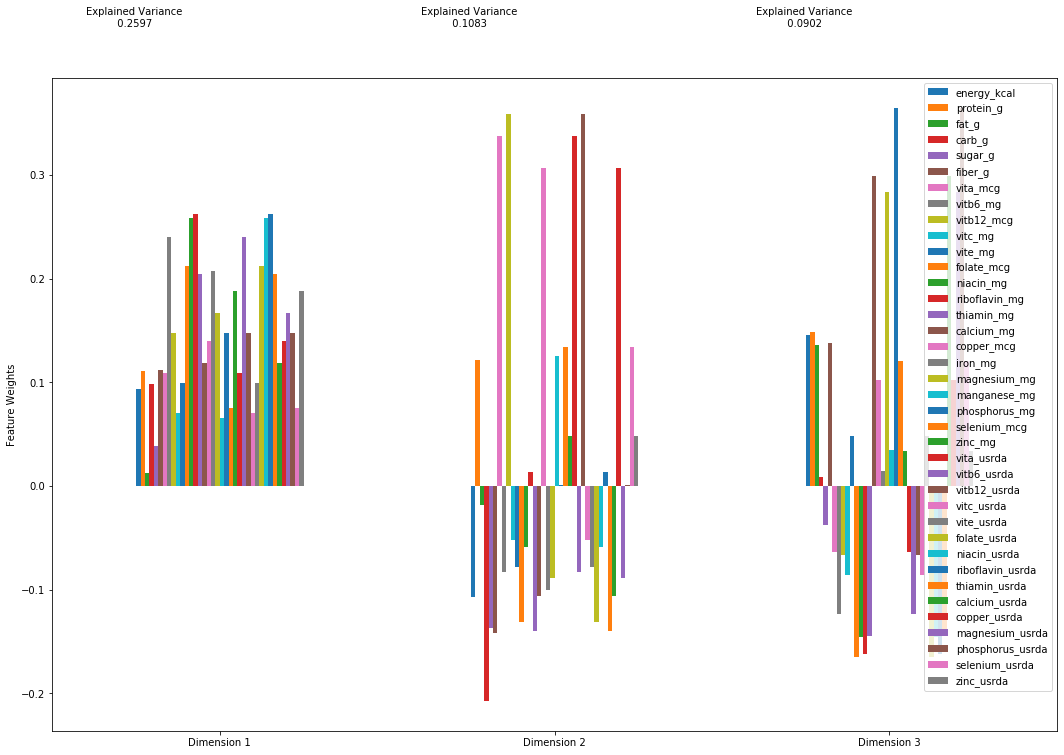

In [121]:
pca_results(X, pca)

I want to kept at least 85% of the variability in the original dataset? When you think you have the answer, store it in the variable num_comps. Then run the following cell to see if your solution matches ours!

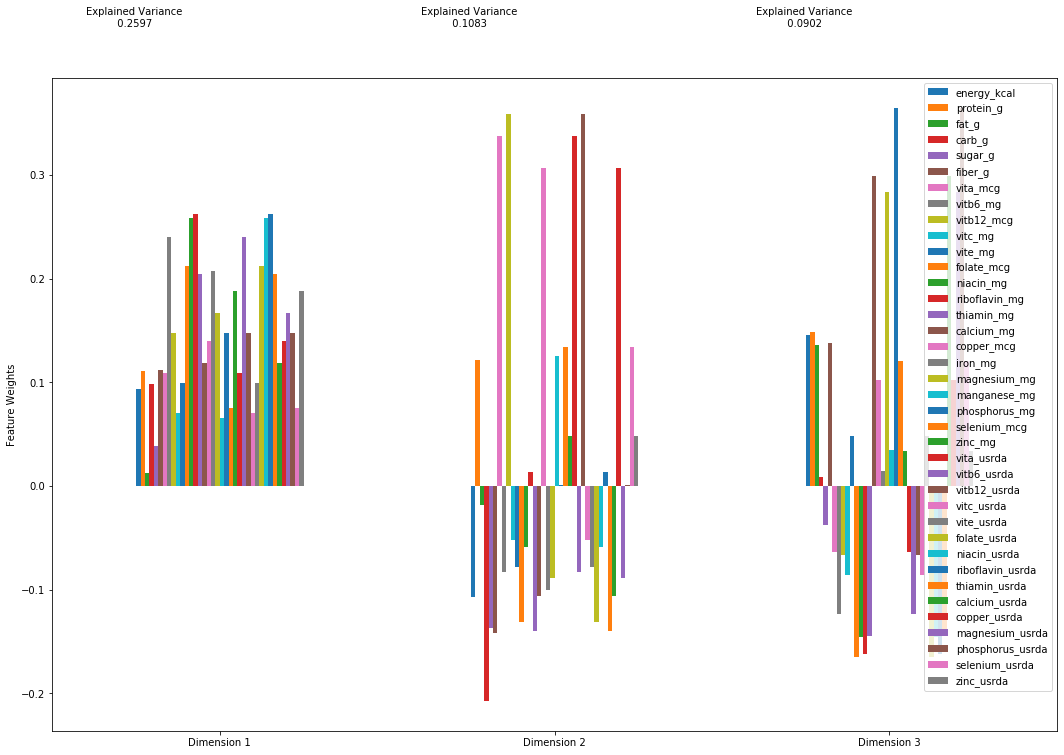

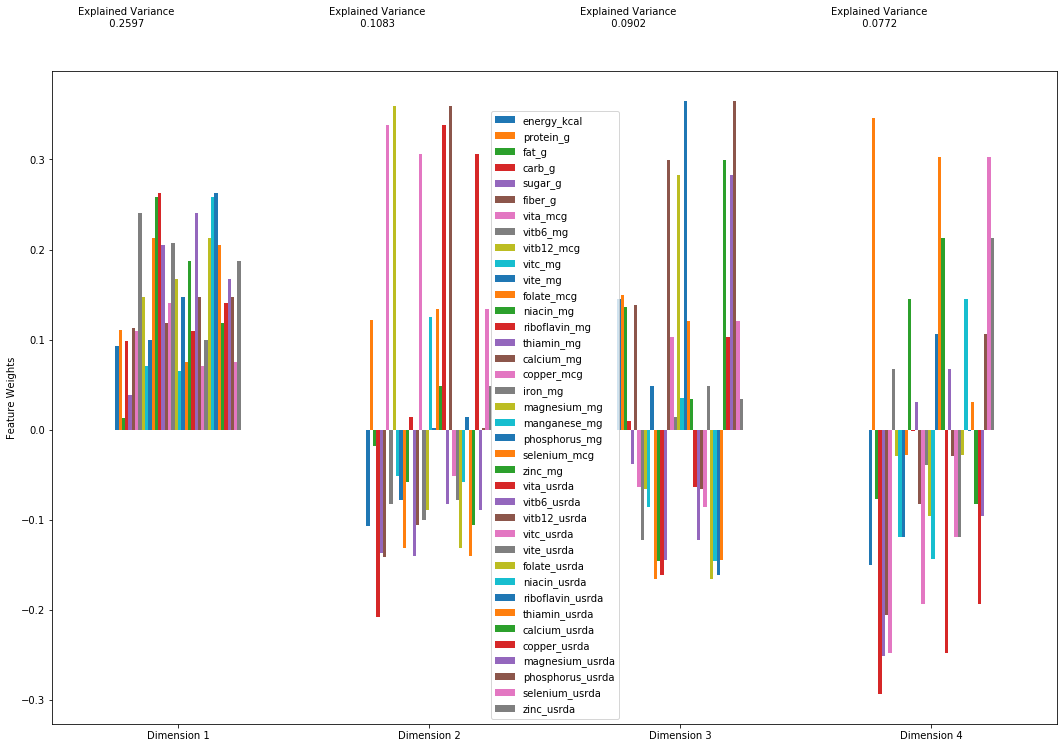

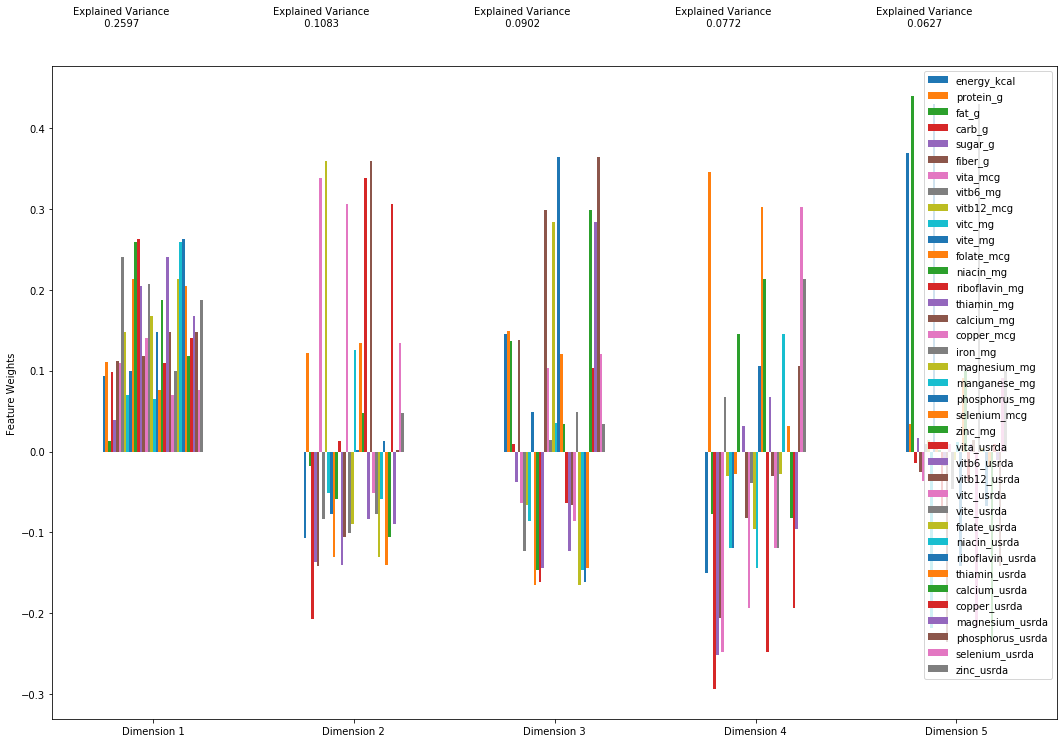

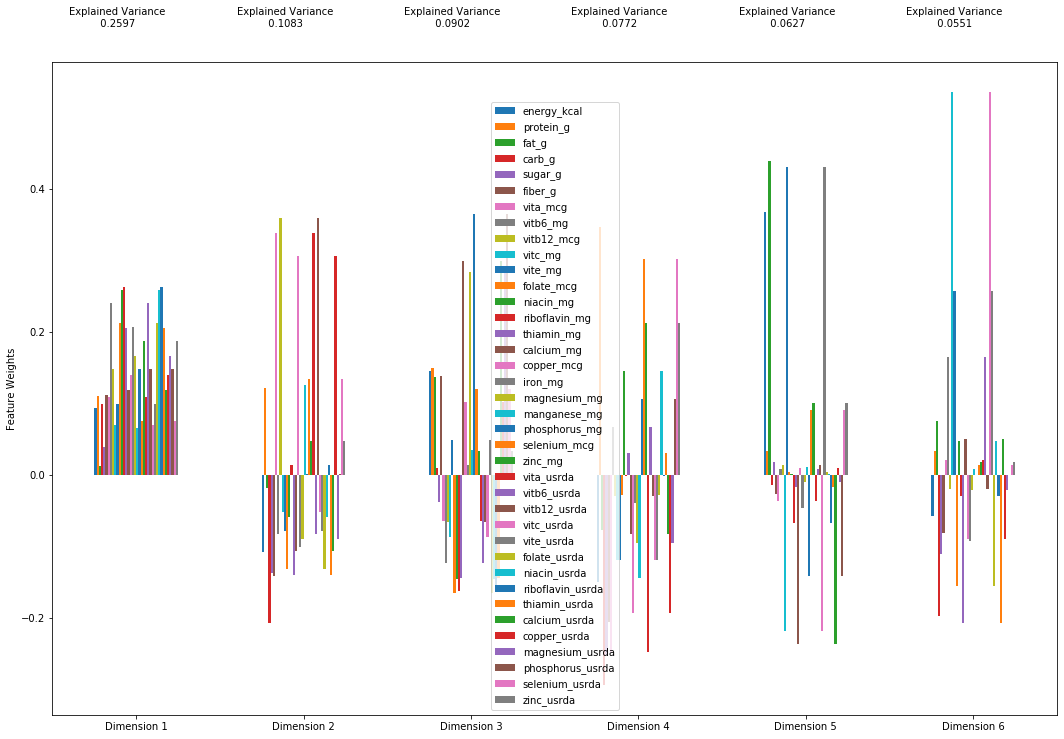

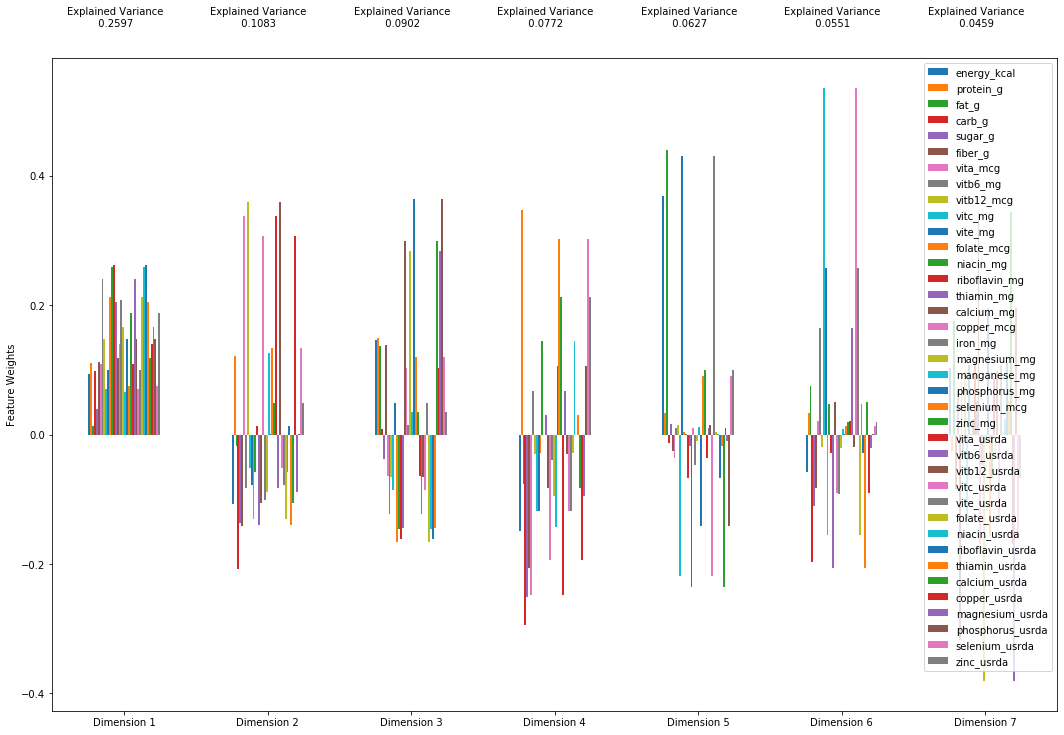

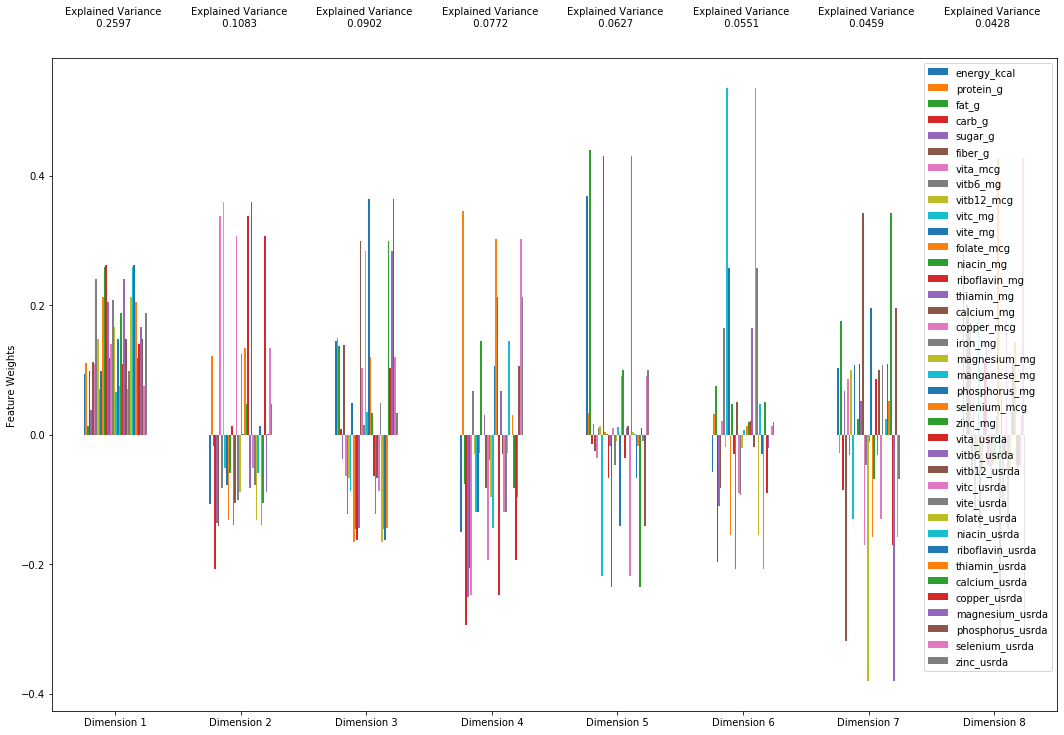

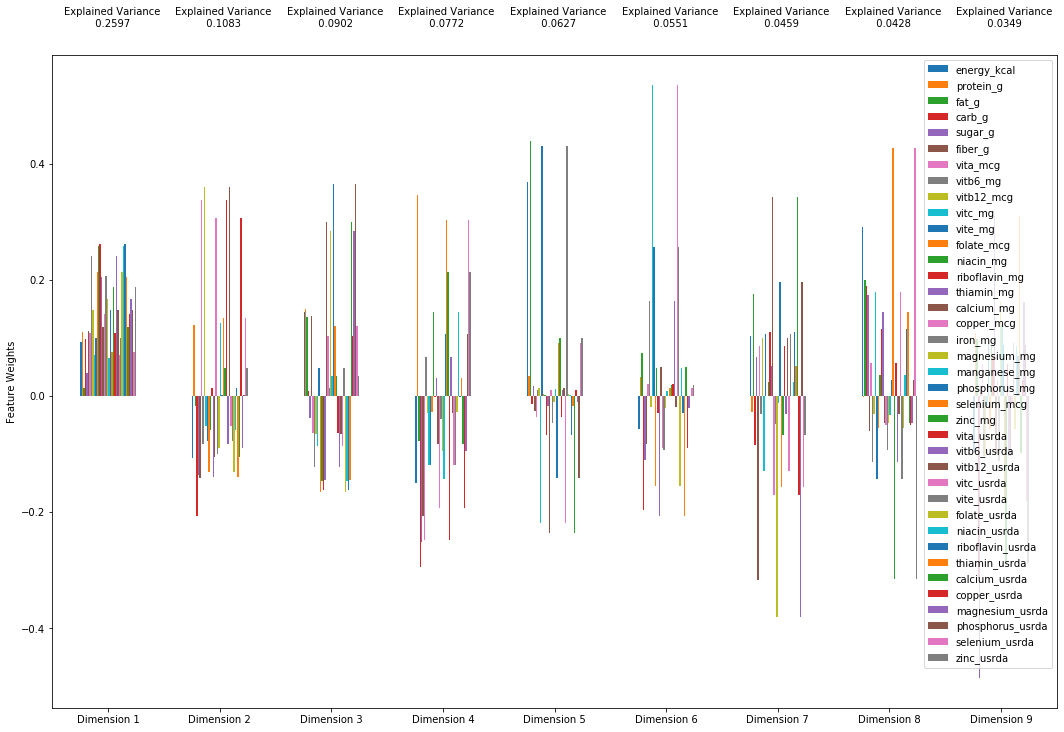

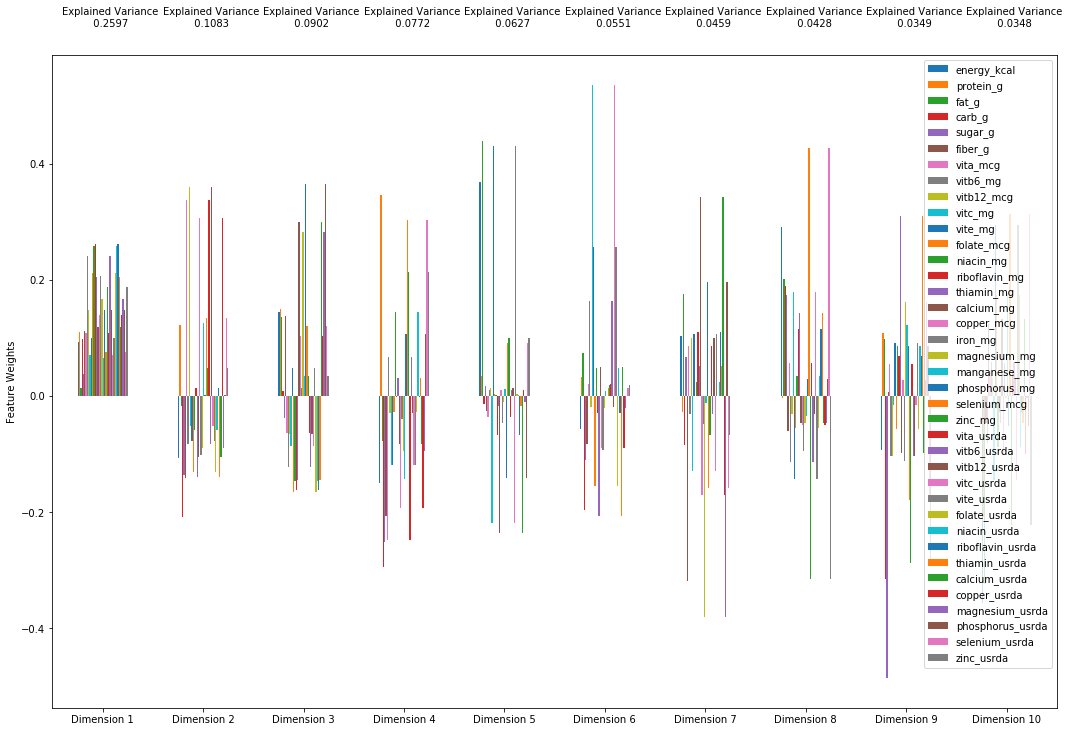

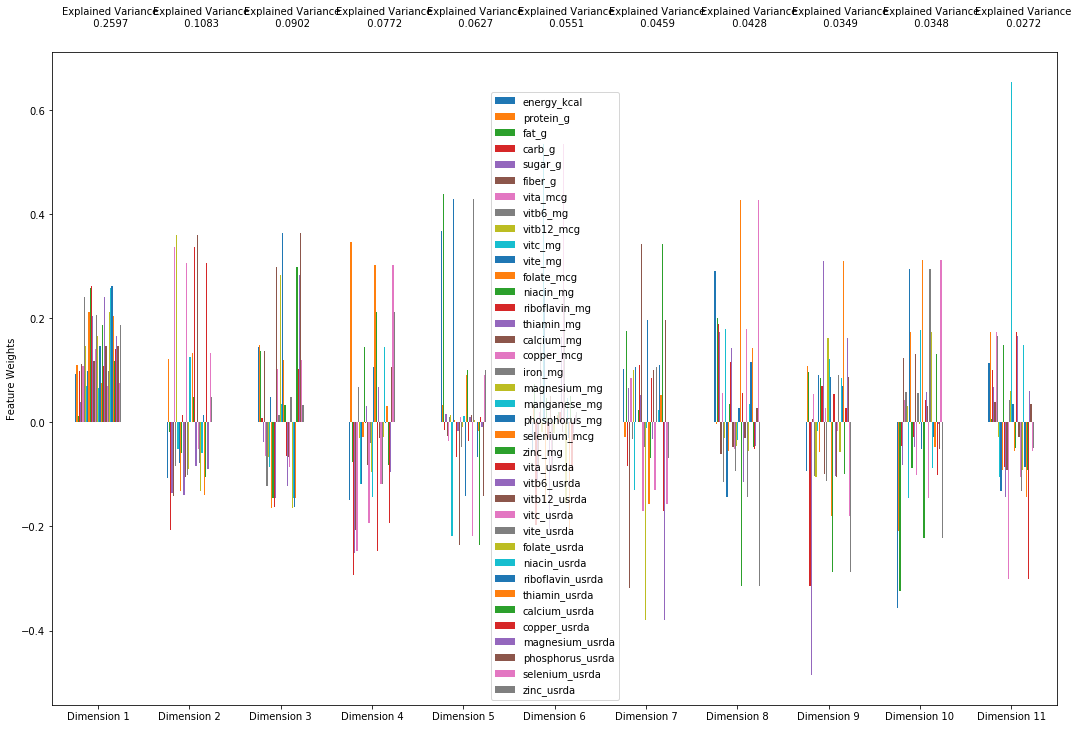

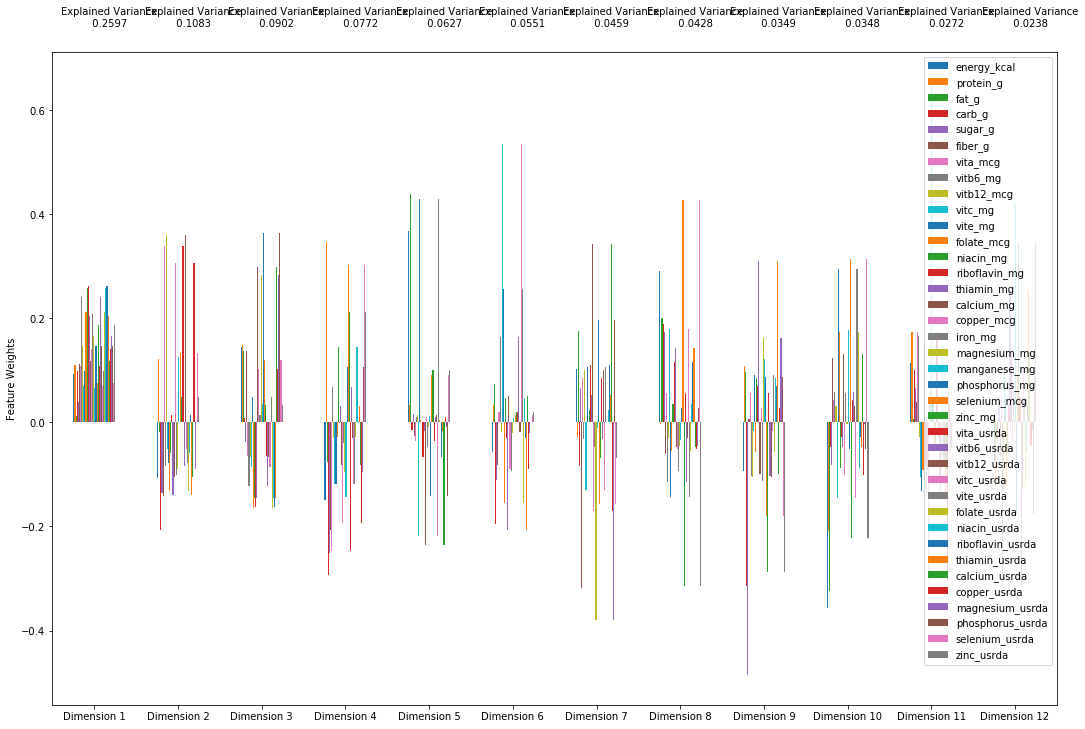

In [123]:
for comp in range(3, df.shape[1]):
    pca, X_pca = do_pca(comp, X)
    comp_check = pca_results(X, pca)
    if comp_check['Explained Variance'].sum() > 0.85:
        break     


In [124]:
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],comp_check['Explained Variance'].sum()))

Using 12 components, we can explain 0.8626000000000001% of the variability in the original data.


Now we will Apply Random Forest Classifier for PCA Demensionality Reduction:

In [125]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    print(confusion_matrix(y_test, y_preds))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc

We will put x_pca with is pca components in place of X

In [128]:
fit_random_forest_classifier(X_pca, y)

[[ 10   1   2   2   1   1   0   2   3   1   1   1   5   6   0   0   0   0
    0   2   1   2   1   0   3]
 [  0  74   2   0   6   3   0   1   0   0   0  21   1   0   1   0   0   0
    0   0   0  17   0   2   8]
 [  0   0 237   0   0   6   1   0   2   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   5   0]
 [  0   0   0 283   0   0   0   1   0   0   0   0  12   0   0   0   0   5
    0   1   2   0   0   0   0]
 [  0   6   1   0  56   2   0   1   0   0   0   3   0   3   0   0   0   0
    0   0   1  11   3  13   4]
 [  0   0   1   0   0  94   5   0   0   1   0   0   0   1   1   0   0   0
    0   0   1   0   0   2   2]
 [  0   0   3   0   0   5  48   0   0   0   0   0   0   5   2   0   0   1
    0   0   0   1   0   2   0]
 [  0   1   0   0   2   1   0  81   0   1   0   0   0   2   0   0   0   0
    1   0   0   1   0   5   0]
 [  0   0   7   0   0   0   0   1  88   0   1   0   0   1   0   0   0   4
    2   2   0   4   0   4   3]
 [  1   1   2   0   1   0   0   2   0  63   0   1   0  

0.7939521800281294

On 3 PCA Components Accuracy is 7% we want 90% Accuracy.So How many PCA Component to achieve this

In [129]:
accs = []
comps = []

for comp in range(2, 20):
    pca, X_pca = do_pca(comp, X)
    comps.append(comp)
    acc = fit_random_forest_classifier(X_pca, y)
    accs.append(acc)
    if acc >= .80:
        print("With only {} components, a random forest acheived an accuracy of {}.".format(comp, acc))
        break

[[  2   1   4   2   0   2   1   1   3   1   3   0   1   5   0   0   0   3
    2   2   1   6   0   1   4]
 [  3  36   5   1   3   8   0   1   6   1   2  22   1   7   0   2   3   0
    0   0   0   9   0   1  25]
 [  2   2 160   0   2   7  15   1   7   8   0   7   1   8   1   1   0   0
    0   0  12   1   0  11   6]
 [  2   0   0 228   1   0   0   0   1   0  10   1  33   0   0   0   5  16
    0   4   0   0   0   0   3]
 [  1   6   2   0  34   2   0   2   1   0   0   9   1   7   0   1   1   0
    1   0   2  18   4   9   3]
 [  0   5  12   0   0  67   6   0   0   1   0   0   0   5   0   1   0   0
    0   0   3   0   1   2   5]
 [  0   4  11   0   1   3  16   1   2   0   1   2   0   2   2   1   1   0
    1   0   5   2   0   2  10]
 [  2   5   3   1   1   2   3  18   2   0   4   2   0   4   0   4  10   3
    1   8   1   2   0   4  15]
 [  2   2  10   2   2   0   1   2  47   2   1   3   0   4   2   0   9   2
    5   7   0   1   0   0  13]
 [  1   2   6   0   0   0   0   1   0  47   1   7   0  

[[ 10   1   4   2   1   1   0   4   1   1   2   0   3   2   0   0   2   1
    1   1   1   3   1   0   3]
 [  1  76   2   0   1   4   1   0   0   0   0  20   0   3   1   0   0   0
    1   0   0  11   0   2  13]
 [  0   0 224   0   0   6   7   0   2   0   0   0   0   5   0   0   0   0
    0   0   2   0   0   5   1]
 [  0   0   0 279   0   0   0   1   0   0   3   0  12   0   0   0   1   6
    0   0   0   0   0   2   0]
 [  1   3   2   0  44   2   0   0   0   0   0   7   0   3   0   3   0   0
    0   0   1  15   4  10   9]
 [  1   0  10   0   0  85   5   0   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   1   4]
 [  1   0   4   0   0   5  42   0   2   0   1   0   0   6   1   0   0   0
    0   0   2   1   0   2   0]
 [  0   0   1   0   1   0   0  68   0   1   1   1   4   4   1   0   0   0
    0   3   0   2   2   4   2]
 [  0   0  11   0   1   0   0   0  84   1   1   0   2   3   0   0   0   5
    2   1   0   1   0   2   3]
 [  2   1   1   0   1   0   0   0   0  64   0   0   0  

[[ 15   0   3   1   0   1   0   1   2   1   2   1   4   2   1   0   2   0
    0   2   1   2   1   1   2]
 [  0  75   2   0   3   4   1   0   0   0   0  21   0   0   1   0   0   0
    0   0   0  17   0   4   8]
 [  0   0 234   0   0   5   2   0   3   0   0   0   0   1   0   0   0   0
    0   0   2   0   0   4   1]
 [  0   0   0 287   0   0   0   1   0   0   0   0   7   0   0   2   0   5
    0   2   0   0   0   0   0]
 [  0   5   2   0  56   2   0   0   0   0   0   1   0   4   0   1   0   0
    0   0   1  11   3  14   4]
 [  0   2   3   0   0  91   6   0   0   1   0   0   0   2   0   0   0   0
    0   0   1   0   0   0   2]
 [  0   0   2   0   0   2  48   0   0   0   0   0   0   8   2   0   1   0
    0   0   1   1   0   2   0]
 [  1   0   1   0   1   1   0  79   1   0   0   0   0   3   0   0   0   0
    1   0   0   2   0   5   0]
 [  0   0   9   0   0   0   0   1  88   0   1   0   0   0   1   0   0   5
    3   2   0   2   0   4   1]
 [  0   0   2   0   1   0   0   2   0  62   0   2   0  

[[ 16   0   2   2   0   0   0   1   3   0   1   0   4   6   1   0   0   0
    0   1   1   3   1   0   3]
 [  0  79   2   0   1   4   0   0   1   0   0  21   0   0   1   0   0   0
    0   0   0  17   0   3   7]
 [  0   0 238   0   0   5   1   0   3   0   0   0   0   1   0   0   0   0
    0   0   1   0   0   3   0]
 [  0   0   0 286   0   0   0   1   0   0   0   0   8   0   0   2   0   5
    0   2   0   0   0   0   0]
 [  0   6   1   0  56   3   0   1   0   0   0   2   0   1   0   0   0   0
    0   0   1  12   3  13   5]
 [  0   0   1   0   0  93   6   0   0   1   0   0   0   1   0   1   0   0
    0   0   0   0   0   2   3]
 [  0   0   2   0   0   4  49   0   2   0   0   0   0   5   1   0   0   0
    0   0   1   1   0   2   0]
 [  0   1   0   0   2   1   0  82   1   0   0   0   0   2   0   0   0   0
    1   0   0   1   0   4   0]
 [  0   0   8   0   0   0   0   3  82   1   1   0   0   1   0   0   0   6
    3   3   0   2   0   4   3]
 [  1   0   1   0   0   0   0   3   1  63   0   1   0  

Analysis of Accuracy According to PCA Components.

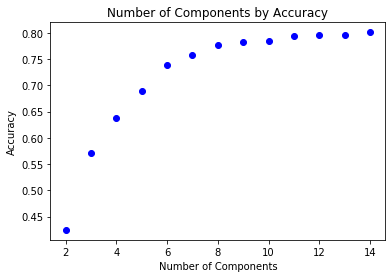

In [130]:
plt.plot(comps, accs, 'bo');
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');

In [131]:
# The max accuracy and corresponding number of components
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.80098452883263, 14)